In [11]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/다중회귀_복합SCFI_2017.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()


,YYYYMM,CH_EXP,FLEET_DEV,CNTR_TIMECHART,WTI,R_GDP_WORLD,DEFLATOR_WORLD,R_GDP_USA,CLI_USA,PMI_US,DEFLATOR_USA,G_RELI,G_DELAY,SCFI_C
0,2014-01,21790540,17312194,46.79983,94.6,1.787676e+07,109.776667,4173.316667,100.7090,53.7,102.690000,0.694882,3.948304,1174.866
1,2014-02,9977430,17385239,46.71077,100.8,1.791018e+07,110.063333,4168.433333,100.7202,57.1,102.830000,0.681136,4.267981,1069.362
2,2014-03,17115050,17367549,46.70015,100.8,1.794359e+07,110.350000,4163.550000,100.7613,55.5,102.970000,0.721154,3.897523,969.145
3,2014-04,20089670,17534040,47.20250,102.1,1.799153e+07,110.543333,4181.376667,100.8148,55.4,103.163333,0.732795,3.648607,1078.462
4,2014-05,20500550,17701139,46.95479,102.2,1.803947e+07,110.736667,4199.203333,100.8649,56.4,103.356667,0.753047,3.736327,1137.112


# 도표 16-11. 로그변환 파이썬 코드(일부)

In [13]:
import numpy as np

# Calculate skewness for each variable
skewness = data.drop(columns=['YYYYMM']).skew()

# Identify variables with absolute skewness greater than 1
high_skew_columns = skewness[abs(skewness) > 1].index

# Original skewness values
original_skewness = skewness[high_skew_columns]

# Display the original skewness
original_skewness


CH_EXP    -1.942499
WTI        1.097413
G_DELAY    1.193102
dtype: float64

# 도표 16-12. 왜도의 절대값이 큰 변수의 로그변환 결과

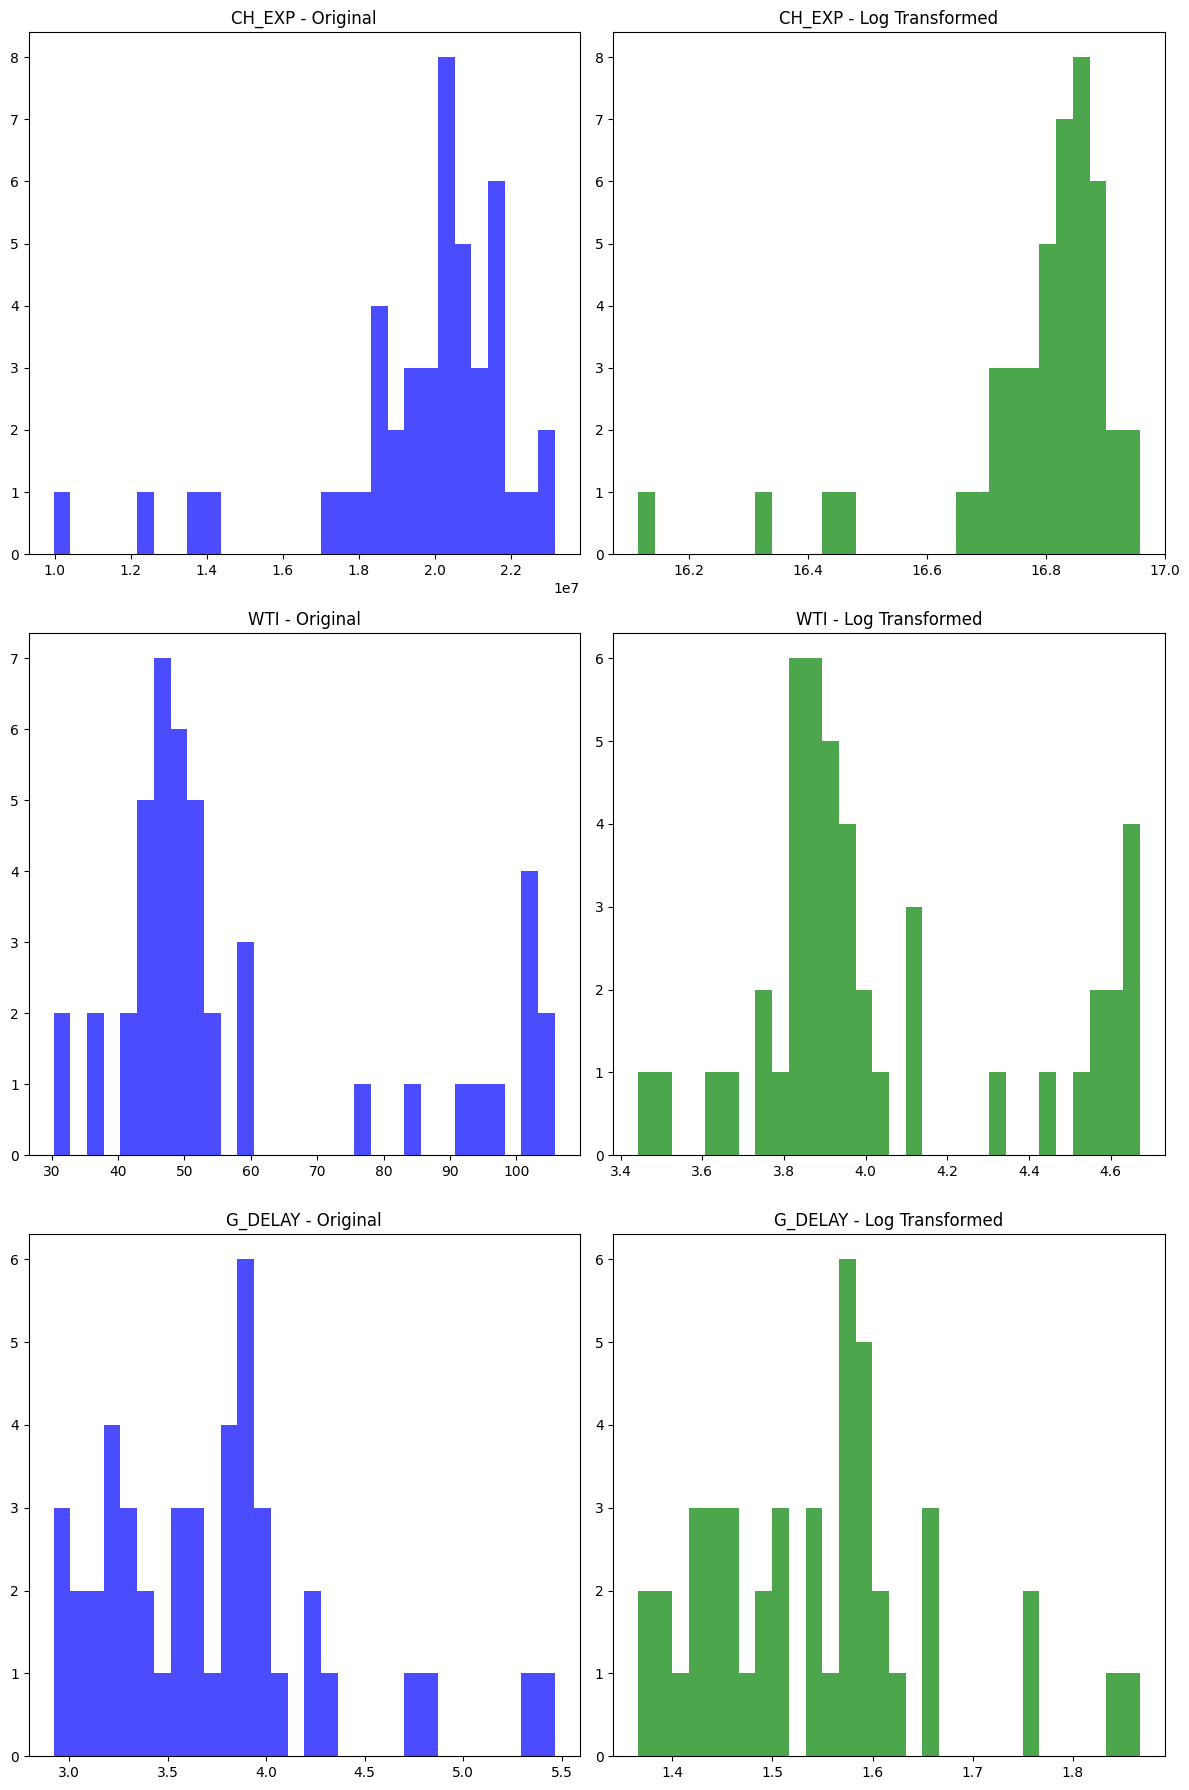

In [14]:
import matplotlib.pyplot as plt

# Function to plot histograms before and after log transformation
def plot_histograms(data, columns):
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, len(columns) * 6))
    for i, column in enumerate(columns):
        # Original data
        axes[i, 0].hist(data[column], bins=30, color='blue', alpha=0.7)
        axes[i, 0].set_title(f'{column} - Original')

        # Log-transformed data
        log_transformed = np.log1p(data[column])  # log1p is used to handle zero values
        axes[i, 1].hist(log_transformed, bins=30, color='green', alpha=0.7)
        axes[i, 1].set_title(f'{column} - Log Transformed')

    plt.tight_layout()
    plt.show()

# Plot histograms for high skewness columns
plot_histograms(data, high_skew_columns)


# 도표 16-11. 로그변환 파이썬 코드(결과값)

In [15]:
# Calculate skewness after log transformation
log_transformed_data = data[high_skew_columns].apply(np.log1p)
log_transformed_skewness = log_transformed_data.skew()

# Combine original and log-transformed skewness into a single DataFrame
skewness_comparison = pd.DataFrame({
    'Original Skewness': original_skewness,
    'Log-transformed Skewness': log_transformed_skewness
})

# Check if skewness has decreased after log transformation
skewness_comparison['Skewness Decreased'] = abs(skewness_comparison['Log-transformed Skewness']) < abs(skewness_comparison['Original Skewness'])

skewness_comparison


,Original Skewness,Log-transformed Skewness,Skewness Decreased
CH_EXP,-1.942499,-2.510326,False
WTI,1.097413,0.730922,True
G_DELAY,1.193102,0.828673,True


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define final feature columns
feature_columns = [
    'FLEET_DEV', 'CNTR_TIMECHART', 'R_GDP_WORLD', 'DEFLATOR_WORLD',
    'R_GDP_USA', 'CLI_USA', 'PMI_US', 'DEFLATOR_USA', 'G_RELI',
    'CH_EXP', 'log_WTI', 'log_G_DELAY'
]

# Add log-transformed columns to the dataset
data['log_WTI'] = np.log1p(data['WTI'])
data['log_G_DELAY'] = np.log1p(data['G_DELAY'])

# Prepare final dataset with selected features and target variable
X = data[feature_columns]
y = data['SCFI_C']

# Split data into training and testing sets (last 6 months for testing)
train_size = len(data) - 6
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], y_train[:5]  # Displaying the first 5 rows of scaled training data and targets


(array([[-1.79449728,  0.05866405, -1.70066782,  1.45763368, -1.83714714,
          1.00717799, -0.13589917, -1.8654897 , -1.32449425,  0.95549279,
          1.41697465,  0.46504251],
        [-1.72206245,  0.04477231, -1.63341207,  1.51881533, -1.89206237,
          1.02283882,  1.66612385, -1.73813819, -1.55626088, -3.55007407,
          1.59541335,  0.9749638 ],
        [-1.73960468,  0.04311578, -1.56615633,  1.57999699, -1.9469776 ,
          1.08030848,  0.81811302, -1.61078668, -0.88153559, -0.82775758,
          1.59541335,  0.38101997],
        [-1.57450444,  0.12147326, -1.46966071,  1.62125903, -1.74650891,
          1.15511692,  0.76511234, -1.43492031, -0.68525843,  0.30677425,
          1.63144705, -0.0438603 ],
        [-1.40880128,  0.082835  , -1.37316509,  1.66252107, -1.54604022,
          1.22517118,  1.29511911, -1.25905394, -0.34379455,  0.46348551,
          1.63420002,  0.10841254]]),
 0    1174.866
 1    1069.362
 2     969.145
 3    1078.462
 4    1137.112
 Na

도표 16-11. 로그변환 파이썬 코드

In [19]:
print("X_train.columns : ", X_train.columns)  # 독립변수 출력

# StandardScaler 인스턴스를 생성한다.
# scaler = StandardScaler()

# 훈련 데이터에 대해 fit과 transform을 동시에 수행한다.
# 이 과정에서 훈련 데이터의 평균과 표준편차를 계산하고, 이를 사용해 데이터를 표준화함
# X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에 대해서는 이미 훈련 데이터로 계산된 평균과 표준편차를 사용해 transform 수행한다.
# 이는 데이터 누수를 방지하고 모델의 일반화 능력을 향상시키기 위해서이다.
# X_test_scaled = scaler.transform(X_test)
# 이후 모델 초기화 등 진행하면서 모형을 개발한다.


X_train.columns :  Index(['FLEET_DEV', 'CNTR_TIMECHART', 'R_GDP_WORLD', 'DEFLATOR_WORLD',
       'R_GDP_USA', 'CLI_USA', 'PMI_US', 'DEFLATOR_USA', 'G_RELI', 'CH_EXP',
       'log_WTI', 'log_G_DELAY'],
      dtype='object')


# 도표 16-14. 로그변환 변수를 반영한 규제회귀모형의 성능 결과

In [17]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
elastic_net = ElasticNet(random_state=42)

# Fit models
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

# Predict on training and testing sets
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

y_train_pred_elastic_net = elastic_net.predict(X_train_scaled)
y_test_pred_elastic_net = elastic_net.predict(X_test_scaled)

# Calculate RMSE and R^2 for training and testing sets
metrics = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'Train RMSE': [
        mean_squared_error(y_train, y_train_pred_ridge, squared=False),
        mean_squared_error(y_train, y_train_pred_lasso, squared=False),
        mean_squared_error(y_train, y_train_pred_elastic_net, squared=False)
    ],
    'Test RMSE': [
        mean_squared_error(y_test, y_test_pred_ridge, squared=False),
        mean_squared_error(y_test, y_test_pred_lasso, squared=False),
        mean_squared_error(y_test, y_test_pred_elastic_net, squared=False)
    ],
    'Train R^2': [
        r2_score(y_train, y_train_pred_ridge),
        r2_score(y_train, y_train_pred_lasso),
        r2_score(y_train, y_train_pred_elastic_net)
    ],
    'Test R^2': [
        r2_score(y_test, y_test_pred_ridge),
        r2_score(y_test, y_test_pred_lasso),
        r2_score(y_test, y_test_pred_elastic_net)
    ]
})

metrics


,Model,Train RMSE,Test RMSE,Train R^2,Test R^2
0,Ridge,53.075226,57.721173,0.939096,-1.079505
1,Lasso,50.991239,56.359327,0.943785,-0.982537
2,ElasticNet,69.819573,76.950671,0.894606,-2.695851
